Training Regression model For the given data, we will use the Linear Regression model. The Linear Regression model is a supervised learning

In [18]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
import numpy as np

  

In [5]:
data = pd.read_csv("housing.csv",delim_whitespace=True, header=None)
data.columns = [
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE',
    'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'
]

x=data.drop("MEDV",axis=1)
y=data["MEDV"]

In [7]:
x_train,x_test,y_trian,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
model= LinearRegression()
model.fit(x_train,y_trian)

y_predict = model.predict(x_test)
print("weight:",model.coef_)
print("INTERCEPT:",model.intercept_)
print("Mean Squared Error:", mean_squared_error(y_test, y_predict))
print("R² Score:", r2_score(y_test, y_predict))


Mean Squared Error: 24.291119474973538
R² Score: 0.6687594935356317


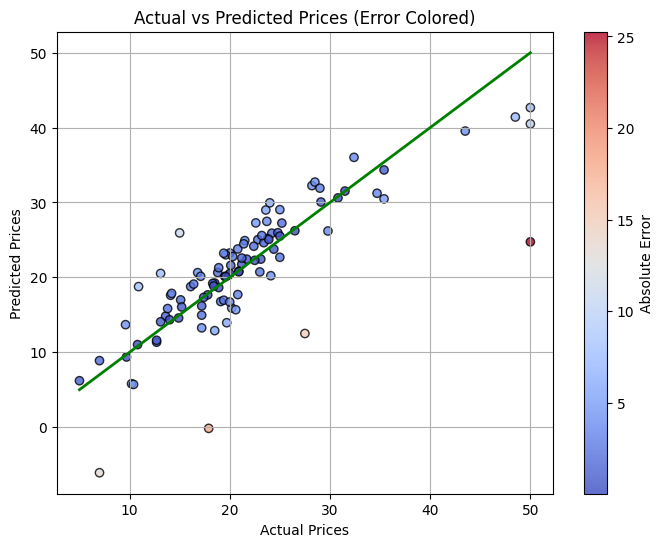

In [19]:

errors = np.abs(y_test - y_predict)

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_predict, c=errors, cmap='coolwarm', edgecolors='k', alpha=0.8)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='green', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices (Error Colored)')
plt.colorbar(label='Absolute Error')
plt.grid(True)
plt.show()